# Python basics

In this section, we will cover basic Python syntax, mathematical expressions and function calls. 

```{note}
Pages in this book with the rocket icon at the top are interactive! Try selecting either the **Binder** or **Live code** buttons to run the code cells on this page!
```

**Interactive tutorials**

This text is intended to be practical and hands-on, so we encourage you to follow along with the code blocks on your own machine or try out the interactive options in the rocket menu at the top!

## Interacting with this page

This page is a **Jupyter Notebook** which has a mix of text blocks and code blocks. The code block can run Python code and show the outputs too.

This is a text blcok. It is where you will find explanations and instructions.

The cell below is a code block. You can edit the code in the code block and run it at will - don't worry this won't change the original textbook or be visible to anyone once you refresh or close the browser. Trying new things whenever you see a code block is *highly encouraged*. Allow yourself to **make mistakes**; it's the fastest way to learn!

In [1]:
# This is a code cell.
# Any outputs of code written here will appear directly below.
print('Hello World')
# Try adding your own print statement below


Hello World


## Running cells

To run a cell, click the cell to select it, and click the `Run` button. Try running the block below.

In [2]:
print("You can run me by selecting me and clicking Run")

You can run me by selecting me and clicking Run


## Cool plots
Jupyter notebooks also allow you display plots and graphics inline. Try running the following two code blocks (don't worry about the code for now).

In [ ]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt

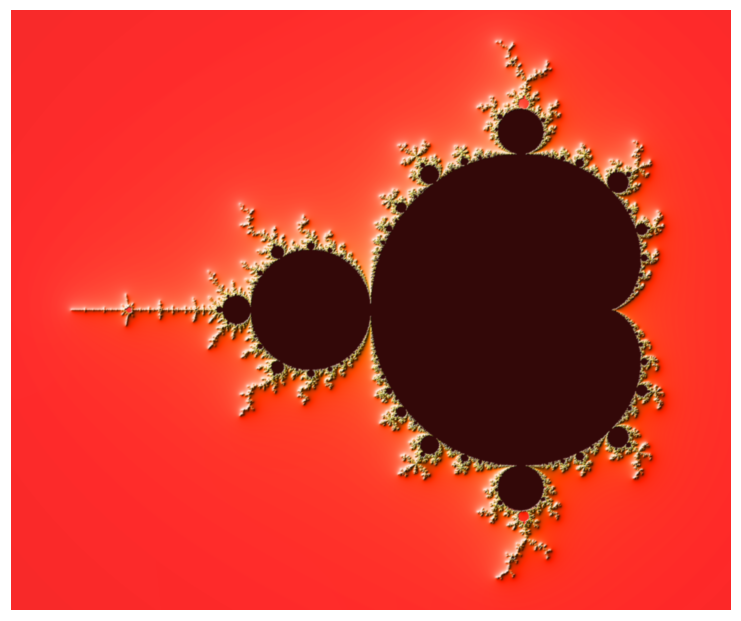

In [2]:
# Taken from the matplotlib examples gallery: https://matplotlib.org/gallery/ (full url below)
# https://matplotlib.org/gallery/showcase/mandelbrot.html#sphx-glr-gallery-showcase-mandelbrot-py
def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = abs(Z) < horizon
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N

xmin, xmax, xn = -2.25, +0.75, 3000 // 2
ymin, ymax, yn = -1.25, +1.25, 2500 // 2
maxiter = 200
horizon = 2.0 ** 40
log_horizon = np.log2(np.log(horizon))
Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

with np.errstate(invalid='ignore'):
    M = np.nan_to_num(N + 1 - np.log2(np.log(abs(Z))) + log_horizon)

dpi = 72
width = 10
height = 10*yn/xn
fig = plt.figure(figsize=(width, height), dpi=dpi)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)

# Shaded rendering
light = colors.LightSource(azdeg=315, altdeg=10)
M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                norm=colors.PowerNorm(0.3), blend_mode='hsv')
ax.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
ax.set_xticks([])
ax.set_yticks([])

plt.show()

**Kernel**: To run your code, this notbook uses something called a **kernel** which interprets the Python and genereates the output. Sometimes this kernel gets bogged down or crashes and needs to be restarted. Try clicking the reset button up top (or refreshing the page if you are using the **Live Code** option). This will clear changes and allow you to re-run the code on the page.

```{note}
For more info on Jupyter notebooks, see the tutorial later in the book (here)[python_jupyter]. For an example of using Jupyter notebooks to communicate scientific results, see LIGO's tutorial for how to find gravitational waves, writting in a fully runnable Jupyter notebook [here](https://mybinder.org/repo/losc-tutorial/LOSC_Event_tutorial)
```

## Syntax and Expressions

Programming languages are made up of **syntax** and **expressions**.

**Syntax** is the *vocabulary and grammar* of the language. These are the specific words, symbols and rules for how to combine them to convey your intent to the computer.

**Expressions** are the *sentences* of the language. All programs do *something* and expressions are how you piece together syntax to tell your program what to do.

The most basic **statements** in a programming language just look like mathematical expressions (pretty much every programming language can be used as a fancy calculator).

For example, we can add (`+`), subtract (`-`), multiply (`*`) and divide (`/`) in Python like so:

In [3]:
2 + 3

5

In [4]:
2 - 3

-1

In [5]:
2 * 3

6

In [6]:
2 / 3

0.6666666666666666

Programming laguages have precise **syntax** (grammatical) rules. For example, in Python you cannot have two separate numbers in a row with no operator in between. If you run the following code, Python will not know how to interpret it and will show a `SyntaxError`:

In [13]:
2   3

SyntaxError: invalid syntax (<ipython-input-13-ab6b67bd67d9>, line 1)

Syntax errors are common for beginners and advanced programmers alike. When you come across any error in Python, make sure to read the description carefully for hints on how to fix it. This `SyntaxError` indicates we are on `line 1` (ok, our program was only one line), but there is also a caret (`^`) pointing to the part of the line that Python didn't expect or understand. This can be a hint that you forgot to tell Python what to do between the `2` and the `3`.

In Python, **errors are there to help**. Learning to embrace and read errors like the `SyntaxError` and help you quickly fix blunders as they come up in your code.

## Operators (math)

Since we work with a lot of (mainly numerical) data in science, mathematical operators are essential in just about every program you will write. In Python, these are the basic arimetic operators:

| Expression Type | Operator | Example    | Value     |
|-----------------|----------|------------|-----------|
| Addition        | `+`      | `2 + 3`    | `5`       |
| Subtraction     | `-`      | `2 - 3`    | `-1`      |
| Multiplication  | `*`      | `2 * 3`    | `6`       |
| Division        | `/`      | `7 / 3`    | `2.33334` |
| Exponentiation  | `**`     | `2 ** 0.5` | `1.41421` |

Python expressions obey the same *order of operations* as in algebra (*BEDMAS*). Python will evaluate expressions in the following order: 

- Brackets
- Exponents
- Multiplication and Division 
- Addition and Subtraction

Let's see some examples. Make sure to write your own too!

In [14]:
1 + 2 * 3

7

In [ ]:
(1 + 2) * 3

## Division and Remainders

Python also has a special **integer division** operator (`//`) to force division to return an `int` (integer) rather than producing a `float` (decimal). It also has a **modulo** operator (`%`) which gives the remainer of an integer division. Then the three division operators are:

| Expression Type  | Operator | Example    | Value     |
|----------------- |----------|------------|-----------|
| Division         | `/`      | `7 / 3`    | `2.33333...` |
| Integer Division | `//`     | `7 // 3`   | `2`       |
| Remainder        | `%`      | `7 % 3`    | `1`       |


## Equality

A last basic operator we will mention here is the equality `==` operator. This operator is used to test if two *expressions* evaluate to the same value.

In [ ]:
4 == 4

In [ ]:
3 == 4

Python will evaluate expressions on either side of the equality operator (`==`) before comparing them.

In [16]:
3 * 4 == 2 * 6

True

Now you know the basic **operators** in Python and can use them to make **expressions**. Remember to explore as you learn to build upon concepts and understand what does and does not work.

For example, what do you think happens when you divide by 0? Try it (and anything else you think of) in the code block below:

In [ ]:
10 / 0

## Variables

So far, the expressions we have seen have all been evaluated on one line, with the result shown right away. Often we want to store the result of an expression to use later. We can store the result of an expression in a **variable**. 

A variable is created in Python with an **assignment** statement involving the `=` sign (not to be confused with the equality operator `==`).

In [20]:
a = 10

Here, the variable `a` was *assigned* the value `10`. Now, if we use `a` in future, it will refer to the value we stored in it.

In [21]:
a

10

In [22]:
a*4

40

If you ever see the following `NameError`, it may be because you are using `==` when you meant to use `=`:

In [18]:
my_variable == 1

NameError: name 'my_variable' is not defined

Variables can be re-assigned at will, just assign a new value with `=`.

In [23]:
a = 471
a

471

## Variable names (syntax)

There are a couple **syntax** rules for naming variables in Python. They must:

- begin with a letter (though they can contain letters and numbers)
- cannot use spaces (replace spaces with `_` underscores)
- cannot contain special characters

In [ ]:
a2 = 2
b_0_e = 3
ch$1 = 17

## Variable names (style)

Although variable names like `i_1_1iIII` are technically *allowed* in Python, they may not be that *useful*. When writing code, we want to be as **expressive** as possible so that it is legible later. For example, if our variable is used to track the number of apples we have, a good name could be `apples`, or perhaps `num_apples`. 


PEP8 also gives some stylistic guidelines for naming variables in Python. See our description of PEP8 [here](python_style)

> [Variable] names should be lowercase, with words separated by underscores as necessary to improve readability

This is in contrast with other languages that recommend the use of `mixedCase` (also called `camelCase`) variable names.


## Variable pitfalls

In Python, expressions are *evaluated* when *assigning* them to a variable. That means that updating a variable won't change previous variables you defined with it.

For example, what do you think will happen when you run the following code? Try it!

In [ ]:
apples = 4
oranges = 3
total_fruit = apples + oranges
apples = 8
oranges = 11
print(total_fruit)

**Protected names**

In Python, there are a few variable and function names that are used by the language and shouldn't be used as variable names. For example, if you want to count the number of times your publication has been printed, you may be inclined to use the variable name `print`. But `print` is the name of a built-in function in Python. What do you think will happen if you run the following?

In [ ]:
print = 2 + 3 + 4 + 5
print

Python allows you to use the variable name `print`, but this could be disasterous later when you try to use the `print` function because now you've redefined it!

In [ ]:
print(1 + 2)

Most code editors help avoid mistakes like this by highlighting laguage-specific protected names like so:

In [ ]:
print
type
help
int
enumerate

Code editors will not always highlight you variables, though so cafeful not to reuse variable names or else you might accidentally overwrite them!

## Call Statements

Call statements in Python are a name followed by `()` parentheses. They are used to invoke functions and methods (more on these later). For example, the absolute value function `abs`:

In [ ]:
abs(-12)

Expressions placed in the `()` are called **arguments**, and the type and number of arguments expected depend on the function. 

## Help!

To get a description of a function and the arguments it accepts, we can use the `help()` function:

In [ ]:
help(abs)

This description tells us that `abs()` takes one argument, `x`, and returns its absolute value. Try `help(hex)` to see one of many nerdy easter eggs built into Python...

In [ ]:
help(hex)

## Multiple arguments

Some functions like `max()` take multiple arguments.

In [ ]:
max(2, 6, 4)

Expressions can also be passed as arguments, and they are evaluated before being passed to the function.

In [ ]:
max(2, 2 + 3, 4)

Python comes with some [built-in functions](https://docs.python.org/3/library/functions.html) such as `abs` and `max`. Soon we will learn to write our own custom Python functions that we can use to simplify tedious or repetative tasks. 

First, we will introduce some common data structures that will be appear in pretty much every Python program you ever write.